In [3]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [65]:
CH8R = pd.read_csv('./magazine/final/CH8R_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [66]:
CH8R['ADFN_2'] = CH8R['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [67]:
CH8R['ADFN_2']

0                          [메탈, 레진, 귀고리, CHANEL, CHANEL]
1      [빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ...
2                    [브랜드, 로고, 장식, 서프보드, CHANEL, CHANEL]
3      [간, 얼루어, 그린, 이슈, 얼루어, 그린, 캠페인, 진행, 많은, 부분, 많은,...
4      [포켓, 장식, 패딩, 머플러, 라벤헴, LAVENHAM, 하얀색, 장갑, CHAN...
                             ...                        
317    [말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,...
318    [로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱...
319    [로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,...
320    [영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s...
321    [영문, 스크립트, 한국, 걸그룹, 최초, 한국, 최초, 에픽하이, 영상, 나온, ...
Name: ADFN_2, Length: 322, dtype: object

### top50 리스트 생성

In [68]:
top500 = pd.read_csv('./CH8R_top500.csv', sep='|', encoding = 'utf-8')

In [69]:
top500

,word,count
0,로제,9163
1,예쁘다,1383
2,귀엽다,1064
3,노래,703
4,사랑,691
...,...,...
495,발라드,24
496,주위,24
497,러시아,24
498,직접,24


In [70]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', 'CHANEL', '음색', '솔로', '음악', '챙', '무대', 'BEST', '매력', '머리', '춤', '느낌', '레전드', '아이돌', '브랜드', '금발', '처음', '직캠', '코첼라', '머리카락', '스타일', '여자', 'LAURENT', '여신', '바람']


In [71]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', 'CHANEL', '음색', '솔로', '음악', '챙', '무대', 'BEST', '매력', '머리', '춤', '느낌', '레전드', '아이돌', '브랜드', '금발', '처음', '직캠', '코첼라', '머리카락', '스타일', '여자', 'LAURENT', '여신', '바람', '최고', '영어', '모델', '공주', '블랙', '한국', '창법', 'KARL', '입덕', 'love', '춤선', '몸매', '가수', '쇼', '분위기', '드레스', '장식', '시작', '퀸', '컬러']


### top100

In [72]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', 'CHANEL', '음색', '솔로', '음악', '챙', '무대', 'BEST', '매력', '머리', '춤', '느낌', '레전드', '아이돌', '브랜드', '금발', '처음', '직캠', '코첼라', '머리카락', '스타일', '여자', 'LAURENT', '여신', '바람', '최고', '영어', '모델', '공주', '블랙', '한국', '창법', 'KARL', '입덕', 'love', '춤선', '몸매', '가수', '쇼', '분위기', '드레스', '장식', '시작', '퀸', '컬러', '스타', '대박', '실력', '찰떡', '핑크', '파리', '패션', '세계', '명품', '라이브', '짱', '애교', '소리', '백', '인간', '허리', '멋있다', '보컬', 'BLINK', 'COUTURE', '헤어', '미모', '주얼리', '천사', '새로운', '요정', '디자이너', '봄', '왕', '인기', '표정', '심장', '신', '사기', '화이트', '다리', '늘', '룩', '완성', '라인', '영화', '노력', '포인트', '디자인', '관심', '사랑스럽다', '재킷', '가방', '스커트', '바']


In [73]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', 'CHANEL', '음색', '솔로', '음악', '챙', '무대', 'BEST', '매력', '머리', '춤', '느낌', '레전드', '아이돌', '브랜드', '금발', '처음', '직캠', '코첼라', '머리카락', '스타일', '여자', 'LAURENT', '여신', '바람', '최고', '영어', '모델', '공주', '블랙', '한국', '창법', 'KARL', '입덕', 'love', '춤선', '몸매', '가수', '쇼', '분위기', '드레스', '장식', '시작', '퀸', '컬러', '스타', '대박', '실력', '찰떡', '핑크', '파리', '패션', '세계', '명품', '라이브', '짱', '애교', '소리', '백', '인간', '허리', '멋있다', '보컬', 'BLINK', 'COUTURE', '헤어', '미모', '주얼리', '천사', '새로운', '요정', '디자이너', '봄', '왕', '인기', '표정', '심장', '신', '사기', '화이트', '다리', '늘', '룩', '완성', '라인', '영화', '노력', '포인트', '디자인', '관심', '사랑스럽다', '재킷', '가방', '스커트', '바', '코코', '순간', '말투', '커버', '고급', '트위드', '워치', '물', '꼭', '독보', '최애', '하우스', 'THE', '제만', '걸그룹', '애기', '클래식', '이미지', '리본', '다양한', '톱', '디렉터', '온', '장', '소름', '배우', '기분', '화보', '버전', '눈치', '한국어', '한국인', '코', '친구', '럭셔리', '외모', '패턴', '특유', 'u', 'ANGEL', 'GLOBAL', 'HUMAN', 'MISSSAINTLAURENT', '코디', '없음', '팬츠', '끝', '풀', '패션쇼', '감', '이지', '수가', 'AN', '미쳤어', '아아', 'I

In [74]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', 'CHANEL', '음색', '솔로', '음악', '챙', '무대', 'BEST', '매력', '머리', '춤', '느낌', '레전드', '아이돌', '브랜드', '금발', '처음', '직캠', '코첼라', '머리카락', '스타일', '여자', 'LAURENT', '여신', '바람', '최고', '영어', '모델', '공주', '블랙', '한국', '창법', 'KARL', '입덕', 'love', '춤선', '몸매', '가수', '쇼', '분위기', '드레스', '장식', '시작', '퀸', '컬러', '스타', '대박', '실력', '찰떡', '핑크', '파리', '패션', '세계', '명품', '라이브', '짱', '애교', '소리', '백', '인간', '허리', '멋있다', '보컬', 'BLINK', 'COUTURE', '헤어', '미모', '주얼리', '천사', '새로운', '요정', '디자이너', '봄', '왕', '인기', '표정', '심장', '신', '사기', '화이트', '다리', '늘', '룩', '완성', '라인', '영화', '노력', '포인트', '디자인', '관심', '사랑스럽다', '재킷', '가방', '스커트', '바', '코코', '순간', '말투', '커버', '고급', '트위드', '워치', '물', '꼭', '독보', '최애', '하우스', 'THE', '제만', '걸그룹', '애기', '클래식', '이미지', '리본', '다양한', '톱', '디렉터', '온', '장', '소름', '배우', '기분', '화보', '버전', '눈치', '한국어', '한국인', '코', '친구', '럭셔리', '외모', '패턴', '특유', 'u', 'ANGEL', 'GLOBAL', 'HUMAN', 'MISSSAINTLAURENT', '코디', '없음', '팬츠', '끝', '풀', '패션쇼', '감', '이지', '수가', 'AN', '미쳤어', '아아', 'I

In [75]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['로제', '예쁘다', '귀엽다', '노래', '사랑', '목소리', 'CHANEL', '음색', '솔로', '음악', '챙', '무대', 'BEST', '매력', '머리', '춤', '느낌', '레전드', '아이돌', '브랜드', '금발', '처음', '직캠', '코첼라', '머리카락', '스타일', '여자', 'LAURENT', '여신', '바람', '최고', '영어', '모델', '공주', '블랙', '한국', '창법', 'KARL', '입덕', 'love', '춤선', '몸매', '가수', '쇼', '분위기', '드레스', '장식', '시작', '퀸', '컬러', '스타', '대박', '실력', '찰떡', '핑크', '파리', '패션', '세계', '명품', '라이브', '짱', '애교', '소리', '백', '인간', '허리', '멋있다', '보컬', 'BLINK', 'COUTURE', '헤어', '미모', '주얼리', '천사', '새로운', '요정', '디자이너', '봄', '왕', '인기', '표정', '심장', '신', '사기', '화이트', '다리', '늘', '룩', '완성', '라인', '영화']


### top50만 남기기

In [76]:
len(CH8R)

322

In [77]:
top30_word = []
for i in range(len(CH8R)):
    w=[]
    for word in CH8R.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [78]:
top50_word = []
for i in range(len(CH8R)):
    w=[]
    for word in CH8R.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [79]:
top100_word = []
for i in range(len(CH8R)):
    w=[]
    for word in CH8R.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [80]:
top200_word = []
for i in range(len(CH8R)):
    w=[]
    for word in CH8R.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [81]:
top300_word = []
for i in range(len(CH8R)):
    w=[]
    for word in CH8R.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [82]:
top500_word = []
for i in range(len(CH8R)):
    w=[]
    for word in CH8R.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [83]:
CH8R

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ch,"가을 트렌드 컬러, 위대한 블랙의 위로","메탈과 레진으로 만든 귀고리는 가격미정, CHANEL(CHANEL).","['메탈', '레진', '귀고리', 'CHANEL', 'CHANEL']","[메탈, 레진, 귀고리, CHANEL, CHANEL]"
1,A,Ch,가을에 어울리는 색을 딱 하나 고르면? 카멜색!,"빈티지한 체크무늬 재킷은 가격미정, CELINE(CELINE). 비비드한 핑크 컬러...","['빈티', '한', '체크', '무늬', '재킷', 'CELINE', 'CELIN...","[빈티지, 한, 체크, 무늬, 재킷, CELINE, CELINE, 비비드, 핑크, ..."
2,A,Ch,급하고 빠르게 배워보는 서핑 아이템,"브랜드 로고를 장식한 서프보드는 가격미정, CHANEL(CHANEL).","['브랜드', '로고', '장식', '서프보드', 'CHANEL', 'CHANEL']","[브랜드, 로고, 장식, 서프보드, CHANEL, CHANEL]"
3,A,Ch,"옷을 사는 걸 멈출 수 없다면, 옷 순환시키기",10년간 <얼루어>에서 그린 이슈와 얼루어 그린 캠페인을 진행하면서 나 역시 많은 ...,"['간', '얼루어', '그린', '이슈', '얼루어', '그린', '캠페인', '...","[간, 얼루어, 그린, 이슈, 얼루어, 그린, 캠페인, 진행, 많은, 부분, 많은,..."
4,A,Ch,스타일에 보온성을 위한 한 끗 차이,"포켓 장식 패딩 머플러는 13만8천원, 라벤헴(LAVENHAM). 하얀색 장갑은 가...","['포켓', '장식', '패딩', '머플러', '라벤헴', 'LAVENHAM', '...","[포켓, 장식, 패딩, 머플러, 라벤헴, LAVENHAM, 하얀색, 장갑, CHAN..."
...,...,...,...,...,...,...
317,YOUTUBE,R,세상 귀욤()열매 혼자 다 먹은듯한 블랙핑크 로제 인스타라이브 (feat_ 지수_ ...,['지수 말투 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 연예인이지만 전형적인 10...,"['지수', '말투', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '연예인',...","[말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,..."
318,YOUTUBE,R,세상에 로제도 데이터 걱정한다_인스타라이브 [블랙핑크로제]_korean_commen...,"['박로제 진짜 매력은 가창력, 춤, 몸매가 아닌 순박함과 멍챙함인 듯ㅋㅋㅋㅌㅌㅌ'...","['박로', '제', '진짜', '매력', '은', '가창력', ',', '춤', ...","[로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱..."
319,YOUTUBE,R,스타일리스트가 분석한 로제 패션이 진짜 넘사벽인 이유_korean_comment.csv,"['로제가 진짜 보석인듯', '솔직히 BLACKPINK는 맴버하나하나 다 패션분석쌉...","['로제', '가', '진짜', '보석', '인', '듯', ""',"", ""'"", '...","[로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,..."
320,YOUTUBE,R,아무데서나 볼 수 없을걸요 로제 커버 화보 촬영현장 비하인드 대방출! by W Ko...,['영어 자막이 추가되었습니다! 즐겁게 감상 부탁드려요 :)English subti...,"['영어', '자막', '이', '추가', '되었습니다', '!', '즐겁게', '...","[영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s..."


### item 남기기

In [84]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [85]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [86]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [87]:
# len(top100_not_item_word)

In [88]:
# top100_not_item_word[1]

In [89]:
top50_word

[['CHANEL', 'CHANEL'],
 ['컬러', 'CHANEL', 'CHANEL'],
 ['브랜드', '장식', 'CHANEL', 'CHANEL'],
 ['스타일', 'LAURENT', 'CHANEL'],
 ['장식', 'CHANEL', 'CHANEL', '컬러', '장식', 'CHANEL'],
 ['CHANEL', 'CHANEL'],
 ['블랙', '드레스', 'CHANEL', 'CHANEL'],
 ['컬러', '컬러', 'CHANEL', 'CHANEL'],
 ['CHANEL',
  'CHANEL',
  '쇼',
  '컬러',
  '장식',
  '분위기',
  'CHANEL',
  '쇼',
  '스타일',
  '컬러',
  '분위기',
  '블랙',
  '컬러',
  '챙',
  '스타일'],
 ['CHANEL', 'CHANEL', '분위기', 'LAURENT', 'LAURENT', '장식', 'CHANEL'],
 ['CHANEL', '브랜드'],
 ['컬러', 'CHANEL', 'CHANEL', '브랜드'],
 ['CHANEL', '스타일', '스타일', '매력', 'CHANEL', 'CHANEL'],
 ['장식', '분위기', '컬러', 'CHANEL', '시작'],
 ['장식', 'CHANEL', 'CHANEL', '장식'],
 ['CHANEL', 'CHANEL', '스타일', 'CHANEL', '장식', '스타일'],
 ['CHANEL', 'CHANEL', 'CHANEL', 'CHANEL'],
 ['CHANEL'],
 ['브랜드', '장식', 'CHANEL', 'CHANEL'],
 ['퀸', '드레스', 'CHANEL', 'CHANEL'],
 ['장식', 'CHANEL', 'CHANEL', '장식', 'CHANEL', 'CHANEL'],
 ['스타일', 'CHANEL', '모델'],
 ['CHANEL', 'CHANEL'],
 ['CHANEL', 'CHANEL'],
 ['CHANEL', 'CHANEL'],
 ['장식', 'CHANEL', 'CHA

In [90]:
len(top50_word)

322

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [91]:
# 어프라이어리(Apriori)
from apyori import apriori

In [92]:
top30_word[0]

['CHANEL', 'CHANEL']

In [148]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.07))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
410,"(로제, 사랑)",0.180124,"[((), (로제, 사랑), 0.18012422360248448, 1.0), ((로...",2
203,"(브랜드, CHANEL)",0.170807,"[((), (브랜드, CHANEL), 0.17080745341614906, 1.0)...",2
400,"(로제, 매력)",0.170807,"[((), (로제, 매력), 0.17080745341614906, 1.0), ((로...",2
424,"(로제, 음악)",0.170807,"[((), (로제, 음악), 0.17080745341614906, 1.0), ((로...",2
308,"(로제, 노래)",0.167702,"[((), (로제, 노래), 0.16770186335403728, 1.0), ((노...",2
422,"(로제, 예쁘다)",0.152174,"[((), (로제, 예쁘다), 0.15217391304347827, 1.0), ((...",2
404,"(로제, 목소리)",0.152174,"[((), (로제, 목소리), 0.15217391304347827, 1.0), ((...",2
213,"(장식, CHANEL)",0.152174,"[((), (장식, CHANEL), 0.15217391304347827, 1.0),...",2
406,"(로제, 무대)",0.149068,"[((), (로제, 무대), 0.14906832298136646, 1.0), ((로...",2
314,"(노래, 목소리)",0.142857,"[((), (노래, 목소리), 0.14285714285714285, 1.0), ((...",2


In [149]:
for item in df['items']:
    if '로제' in item:
        print(item)

frozenset({'로제', '사랑'})
frozenset({'로제', '매력'})
frozenset({'로제', '음악'})
frozenset({'로제', '노래'})
frozenset({'로제', '예쁘다'})
frozenset({'로제', '목소리'})
frozenset({'로제', '무대'})
frozenset({'로제', '챙'})
frozenset({'로제', '귀엽다'})
frozenset({'로제', '느낌'})
frozenset({'로제', 'LAURENT'})
frozenset({'로제', '음색'})
frozenset({'로제', '분위기'})
frozenset({'로제', '최고'})
frozenset({'로제', '한국'})
frozenset({'로제', '아이돌'})
frozenset({'로제', '처음'})
frozenset({'가수', '로제'})
frozenset({'로제', '스타일'})
frozenset({'로제', '머리'})
frozenset({'로제', '솔로'})
frozenset({'로제', '춤'})
frozenset({'로제', 'BLINK'})
frozenset({'로제', '여자'})
frozenset({'로제', '스타'})
frozenset({'로제', '레전드'})
frozenset({'로제', '천사'})
frozenset({'로제', '시작'})
frozenset({'로제', '영어'})
frozenset({'로제', '걸그룹'})
frozenset({'로제', '짱'})
frozenset({'로제', '보컬'})
frozenset({'로제', '공주'})
frozenset({'로제', '금발'})
frozenset({'로제', '여신'})
frozenset({'로제', '소리'})
frozenset({'로제', '대박'})
frozenset({'로제', '최애'})
frozenset({'로제', '표정'})
frozenset({'로제', '여서'})
frozenset({'로제', '패션'})
fro

In [150]:
df[df['items'] == {'리사'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [151]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [152]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [153]:
pos = nx.spring_layout(G)

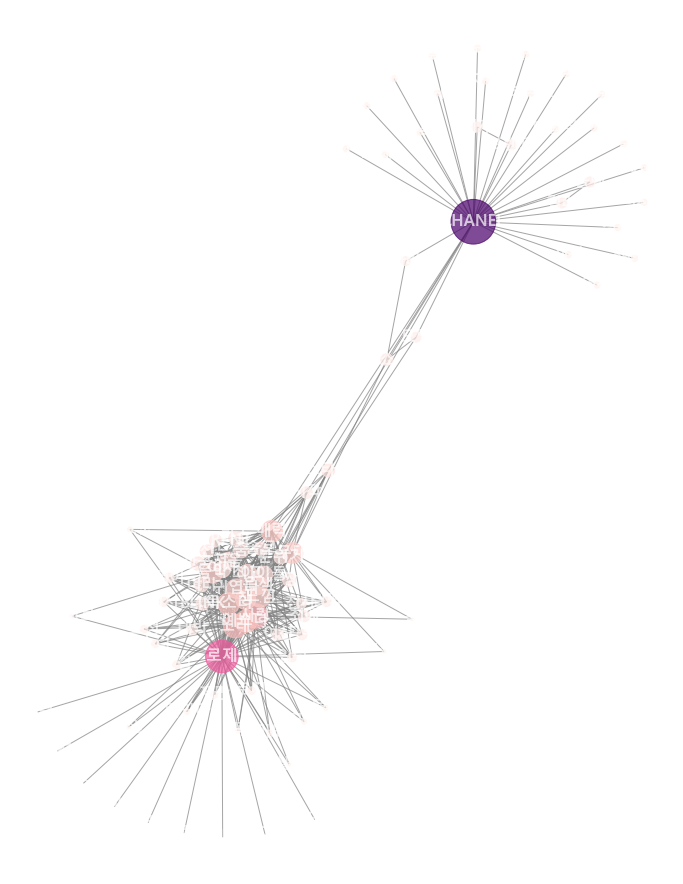

In [154]:
plt.figure(figsize = (12, 16)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_CH8R_top500_mis07-w.png', bbox_inches = 'tight', transparent=True)
plt.show()


In [31]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']